## Imports

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn import preprocessing
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os

data_path = "../dataset/data/"

## Load the data

In [2]:
def load():

    full_train_data = np.array([])
    full_valid_data = np.array([])
    full_test_data = np.array([])
    full_train_labels = np.array([])
    full_valid_labels = np.array([])
    full_test_labels = np.array([])

    dirs = os.listdir(data_path)
    for folder in dirs:
        (train_data, train_labels), (valid_data, valid_labels), (test_data, test_labels) = load_clean_data(folder)
        print(f"{folder} loaded")
        
        # train
        full_train_data = np.append(full_train_data, train_data)
        full_train_labels = np.append(full_train_labels, train_labels)
        # valid
        full_valid_data = np.append(full_valid_data, valid_data)
        full_valid_labels = np.append(full_valid_labels, valid_labels)
        # test
        full_test_data = np.append(full_test_data, test_data)
        full_test_labels = np.append(full_test_labels, test_labels)

    # ? reshaping
    full_train_data = full_train_data.reshape(len(full_train_labels), 5, 100, 1)
    full_valid_data = full_valid_data.reshape(len(full_valid_labels), 5, 100, 1)
    full_test_data = full_test_data.reshape(len(full_test_labels), 5, 100, 1)

    return (
        (full_train_data, full_train_labels),
        (full_valid_data, full_valid_labels),
        (full_test_data, full_test_labels)
    )

In [3]:
def load_clean_data(folder_name):
    # data
    train_data = np.load(f"{data_path}{folder_name}/train_data.npy")
    valid_data = np.load(f"{data_path}{folder_name}/valid_data.npy")
    test_data = np.load(f"{data_path}{folder_name}/test_data.npy")
    # labels
    train_labels = np.load(f"{data_path}{folder_name}/train_labels.npy")
    valid_labels = np.load(f"{data_path}{folder_name}/valid_labels.npy")
    test_labels = np.load(f"{data_path}{folder_name}/test_labels.npy")
    # return complete tuples
    return ((train_data, train_labels), (valid_data, valid_labels), (test_data, test_labels))

## Create the model

### Load the data

In [4]:
(train_data, train_labels), (valid_data, valid_labels), (test_data, test_labels) = load()

E003 loaded
E004 loaded
E005 loaded
E006 loaded
E007 loaded
E011 loaded
E012 loaded
E013 loaded
E016 loaded
E024 loaded
E027 loaded
E028 loaded
E037 loaded
E038 loaded
E047 loaded
E050 loaded
E053 loaded
E054 loaded
E055 loaded
E056 loaded
E057 loaded
E058 loaded
E059 loaded
E061 loaded
E062 loaded
E065 loaded
E066 loaded
E070 loaded
E071 loaded
E079 loaded
E082 loaded
E084 loaded
E085 loaded
E087 loaded
E094 loaded
E095 loaded
E096 loaded
E097 loaded
E098 loaded
E100 loaded
E104 loaded
E105 loaded
E106 loaded
E109 loaded
E112 loaded
E113 loaded
E114 loaded
E116 loaded
E117 loaded
E118 loaded
E119 loaded
E120 loaded
E122 loaded
E123 loaded
E127 loaded
E128 loaded


In [5]:
# visualize some stats about the data
print(f"- {len(train_data)} training genes")
print(f"- {len(valid_data)} validation genes")
print(f"- {len(test_data)} test genes")

- 369544 training genes
- 369544 validation genes
- 369432 test genes


## Normalization & Standardization

In [6]:
mean = np.mean(train_data)
train_data-=mean
valid_data-=mean
test_data-=mean

In [7]:
std = np.std(train_data)
train_data/=std
valid_data/=std
test_data/=std

In [8]:
print(f"mean:{np.mean(train_data)}\tstd:{np.std(train_data)}")

mean:-1.1735407071433278e-16	std:0.9999999999999966


## Utility functions

In [9]:
def plot_metrics(history):
    # accuracy
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.ylim([0.5, 1])
    plt.legend(loc="lower right")
    plt.show()
    # AUC
    plt.plot(history.history["auc"], label="auc")
    plt.plot(history.history["val_auc"], label="val_auc")
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.ylim([0.5, 1])
    plt.legend(loc="lower right")
    plt.show()
    # loss
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.ylim([0,1])
    plt.legend(loc="lower right")
    plt.show()

## Modeling
Here we build several incremental models.

### Baseline model

`loss: 0.4767 - auc: 0.7747 - accuracy: 0.7674`

`Baseline | min: 0.6968313455581665 - max: 0.8662115335464478 - mean: 0.7726049348711967`

#### Reverse datasets

`loss: 0.4648 - auc: 0.7805 - accuracy: 0.7708`

`Baseline | min: 0.6999223232269287 - max: 0.8744890689849854 - mean: 0.7795403323003224`

In [87]:
train_data = train_data.reshape(len(train_data),5,100,1)
valid_data = valid_data.reshape(len(valid_data),5,100,1)
test_data = test_data.reshape(len(test_data),5,100,1)

In [88]:
model = models.Sequential(name="Baseline")
model.add(layers.Flatten(input_shape=(5, 100, 1)))
model.add(layers.Dense(1, activation="sigmoid"))

### Model - DeepChrome
#### loss: 0.4808 - auc: 0.7788 - accuracy: 0.7658

In [10]:
train_data = train_data.reshape(len(train_data),5,100)
valid_data = valid_data.reshape(len(valid_data),5,100)
test_data = test_data.reshape(len(test_data),5,100)

In [11]:
model = models.Sequential(name="DeepChrome")
# stage 1
model.add(layers.Conv1D(10, 5, activation="relu", input_shape=(5,100), padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling1D(pool_size=5))
# stage 2
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(625, activation='linear'))
model.add(layers.ReLU())
model.add(layers.Dense(125, activation='linear'))
# stage 3
model.add(layers.Dense(125, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Model - UltraChrome

`loss: 0.4420 - auc: 0.7985 - accuracy: 0.7839`

`UltraChrome | min: 0.705967128276825 - max: 0.88916015625 - mean: 0.792907432786056`

#### Reverse datasets

`loss: 0.4402 - auc: 0.7986 - accuracy: 0.7795`

`UltraChrome | min: 0.703437089920044 - max: 0.8978993892669678 - mean: 0.7944730956639562`

In [95]:
train_data = train_data.reshape(len(train_data),5,100)
valid_data = valid_data.reshape(len(valid_data),5,100)
test_data = test_data.reshape(len(test_data),5,100)

In [96]:
model = models.Sequential(name="UltraChrome")
# stage 1 => CNN
model.add(layers.Conv1D(50, 5, activation="relu", input_shape=(5,100), padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling1D(pool_size=5))
# stage 2 => FNN
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
# final stage
model.add(layers.Dense(1, activation='sigmoid'))

### Model - CNN Chrome
#### loss: 0.4317 - auc: 0.8168 - accuracy: 0.7831

In [69]:
train_data = train_data.reshape(len(train_data),5,100,1)
valid_data = valid_data.reshape(len(valid_data),5,100,1)
test_data = test_data.reshape(len(test_data),5,100,1)

In [94]:
model = models.Sequential(name="CNN Chrome")
# stage 1 => CONV 2D
model.add(layers.Conv2D(25, 5, activation="relu", input_shape=(5,100,1), padding="same"))
model.add(layers.MaxPooling2D(pool_size=5))
# stage 2 => FNN
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
# final stage
model.add(layers.Dense(1, activation='sigmoid'))

### Model - Deep CNN Chrome

`loss: 0.4313 - auc: 0.8168 - accuracy: 0.7773`

`model:Deep_CNN_Chrome | min: 0.6877831220626831 - max: 0.8880349397659302 - mean: 0.7763664754373687`

In [54]:
train_data = train_data.reshape(len(train_data),5,100,1)
valid_data = valid_data.reshape(len(valid_data),5,100,1)
test_data = test_data.reshape(len(test_data),5,100,1)

In [58]:
model = models.Sequential(name="Deep_CNN_Chrome")
# stage 1 => CONV 2D
model.add(layers.Conv2D(50, 5, activation="relu", input_shape=(5,100,1), padding="same"))
model.add(layers.MaxPooling2D(pool_size=2))
# stage 2 => FNN
model.add(layers.Flatten())
# model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
# final stage
model.add(layers.Dense(1, activation='sigmoid'))

## Training

### Visualize the model

In [97]:
model.summary()

Model: "UltraChrome"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 5, 50)             25050     
_________________________________________________________________
batch_normalization_15 (Batc (None, 5, 50)             200       
_________________________________________________________________
re_lu_4 (ReLU)               (None, 5, 50)             0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 50)             0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 50)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               

In [98]:
model.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["AUC","accuracy"])

# history = model.fit(train_data, train_labels, epochs=10, validation_data=(valid_data, valid_labels))
history = model.fit(valid_data, valid_labels, epochs=10, validation_data=(train_data, train_labels))

Epoch 1/10
11549/11549 [==============================] - 59s 5ms/step - loss: 0.5831 - auc: 0.7071 - accuracy: 0.6768 - val_loss: 0.6170 - val_auc: 0.7230 - val_accuracy: 0.6147
Epoch 2/10
11549/11549 [==============================] - 56s 5ms/step - loss: 0.5458 - auc: 0.7508 - accuracy: 0.6985 - val_loss: 0.6174 - val_auc: 0.7272 - val_accuracy: 0.6191
Epoch 3/10
11549/11549 [==============================] - 62s 5ms/step - loss: 0.5397 - auc: 0.7583 - accuracy: 0.7039 - val_loss: 0.6314 - val_auc: 0.7305 - val_accuracy: 0.6237
Epoch 4/10
11549/11549 [==============================] - 61s 5ms/step - loss: 0.5347 - auc: 0.7645 - accuracy: 0.7090 - val_loss: 0.6211 - val_auc: 0.7333 - val_accuracy: 0.6216
Epoch 5/10
11549/11549 [==============================] - 59s 5ms/step - loss: 0.5352 - auc: 0.7647 - accuracy: 0.7068 - val_loss: 0.6015 - val_auc: 0.7345 - val_accuracy: 0.6383
Epoch 6/10
11549/11549 [==============================] - 65s 6ms/step - loss: 0.5329 - auc: 0.7668 - acc

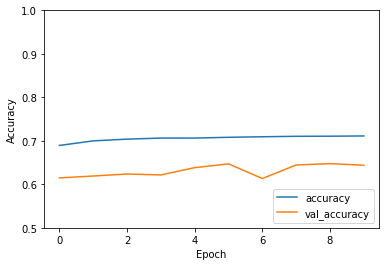

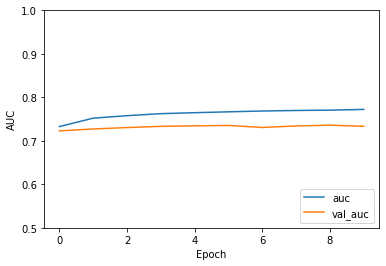

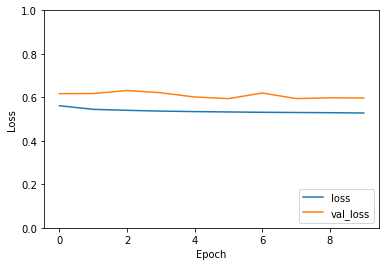

In [99]:
plot_metrics(history)

## Testing
> **Only once we have chosen the hyper-parameters! Avoid tuning on test set.**

### Metrics

In [100]:
test_loss, test_auc, test_acc = model.evaluate(test_data, test_labels, verbose=2)

11545/11545 - 20s - loss: 0.4402 - auc: 0.7986 - accuracy: 0.7795


### Separated metrics

In [101]:
losses = []
aucs = []
accs = []
unit = 6597
for i in range(56):    
    test_loss, test_auc, test_acc = model.evaluate(test_data[i*unit:(i+1)*unit], test_labels[i*unit:(i+1)*unit], verbose=1)
    losses.append(test_loss)
    aucs.append(test_auc)
    accs.append(test_acc)
print(f"{model.name} | min: {min(aucs)} - max: {max(aucs)} - mean: {np.mean(aucs)}")

207/207 [==============================] - 0s 2ms/step - loss: 0.4367 - auc: 0.8271 - accuracy: 0.7667
UltraChrome | min: 0.703437089920044 - max: 0.8978993892669678 - mean: 0.7944730956639562
